In [1]:
def print1(iterable1,antes='',despues=''):
    print(antes+'['+', '.join((str(val) for val in iterable1))+']'+despues)

def print2(iterable2):
    print('[')
    for iterable1 in iterable2:
        print1(iterable1,antes=' ',despues=',')
    print(']')

def printnp(matrix):
     return print2(matrix.tolist())

# Repaso espacio Nulo y Espacio Columna

Sea $A= \left[\matrix{
11 & 2 & 13 &  3 & 0\\
4 &  15 & 19 & 6 & 1 \\
7 &  8 & 15 & 19 & 1}\right]$

El **espacio nulo de $A$**, $\text{Nu}(A)$ es el conjunto de los vectores $\vec{x}$ que permiten solucionar la siguiente ecuación.

$A \vec{x} = \vec{0}$

Como $A$ es de $3 \times 5$ entonces $\vec{x}$ es de 5 renglones y $\vec{0}$ es de 3 renglones.

$A_{3 \times 5} \vec{x}_{5 \times 1} = \vec{0}_{3 \times 1}$

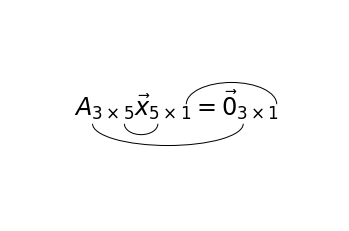

In [2]:
# Omitir este código, que genera el siguiente gráfico
import matplotlib.pyplot as plt
import matplotlib
fig, ax = plt.subplots()
ax.text(.2, 0.5, r'$A_{3 \times 5} \vec{x}_{5 \times 1} = \vec{0}_{3 \times 1}$',{'fontsize': 24})
ax.add_artist(matplotlib.patches.Arc((0.4,0.46), 0.1, 0.1, angle=0.0, theta2=0.0, theta1=180.0))
ax.add_artist(matplotlib.patches.Arc((0.48,0.46), 0.45, 0.2, angle=0.0, theta2=0.0, theta1=180.0))
ax.add_artist(matplotlib.patches.Arc((0.67,0.55), 0.27, 0.2, angle=0.0, theta1=0.0, theta2=180.0))
ax.axis('off')
plt.show()



$\left[\matrix{
11 & 2 & 13 &  3 & 0\\
4 &  15 & 19 & 6 & 1 \\
7 &  8 & 15 & 19 & 1}\right]\left( \matrix{ x_0\\x_1\\x_2\\x_3\\x_4} \right)=\left( \matrix{0\\0\\0} \right)$

Para encontrar la solución de la anterior operación de matriz por vector hay que solucionar el respectivo sistema de ecuaciones homogéneo.



In [3]:
import numpy as np

A=np.matrix([ 
    [11, 2, 13,  3, 0, 0],
    [4,  15, 19, 6, 1, 0],
    [7,  8, 15, 19, 1, 0]
])

A

matrix([[11,  2, 13,  3,  0,  0],
        [ 4, 15, 19,  6,  1,  0],
        [ 7,  8, 15, 19,  1,  0]])

In [4]:
A[[0,1],:] = A[[1,0],:]
A[1,:] = 11*A[0,:] - 4*A[1,:]
A[2,:] = 7*A[0,:] - 4*A[2,:]
A[[2,1],:] = A[[1,2],:]
A[2,:] = 157*A[1,:] - 73*A[2,:]
A[0,:] = 15*A[1,:] - 73*A[0,:]
A[1,:] = 34*A[2,:] - 9280*A[1,:]
A[0,:] = 948*A[2,:] - 9280*A[0,:]

A

matrix([[2709760,       0, 2709760,       0,  -54896,       0],
        [      0, -677440, -677440,       0,  -39128,       0],
        [      0,       0,       0,   -9280,    -332,       0]])

Finalmente, se escribe la solución general.

$\left( \matrix{x_0\\x_1\\x_2\\x_3\\x_4} \right) =
t_0\left( \matrix{-1\\-1\\1\\0\\0} \right) +
t_1\left( \matrix{\frac{47}{2320}\\ \frac{-67}{1160} \\ 0 \\ \frac{-83}{2320} \\1} \right)$

La cual corresponde a la siguiente operación de matriz por vector, en la cual ya está despejado el vector $\vec{x}$.

$ \left[\matrix{
-1&\frac{47}{2320}\\ -1&\frac{-67}{1160} \\ 1&0 \\ 0&\frac{-83}{2320} \\0&1}
\right]\left( \matrix{t_0\\t_1} \right) =
\left( \matrix{x_0\\x_1\\x_2\\x_3\\x_4} \right)$

Como el sistema tiene infinitas soluciones, porque tiene dos parámetros, entonces para cada valor de $\vec{t}=\left( \matrix{t_0\\t_1} \right)$ hay una solución.

El conjunto solución recoge todas estas infinitas soluciones. El conjunto que recoge todas las multiplicaciones de $C=\left[\matrix{
-1&\frac{47}{2320}\\ -1&\frac{-67}{1160} \\ 1&0 \\ 0&\frac{-83}{2320} \\0&1}
\right]$ por cada vector $\vec{t}$ se llama **el espacio columna de $C$**,  $\text{Co}(C)$.

Como $\vec{x}=\left( \matrix{x_0\\x_1\\x_2\\x_3\\x_4} \right) \in \mathbb{R}^5$. Entonces $\text{Co}(C) \subseteq \mathbb{R}^5$ al igual que  $\text{Nu}(A) \subseteq \mathbb{R}^5$

El subconjunto $S$ de $\mathbb{R}^5$  que cumple $\text{Nu}(A)=S=\text{Co}(C)$  se llama **subespacio de $\mathbb{R}^5$**


In [5]:
from fractions import Fraction as frac # Librería para el uso de fraccionarios
                                       # frac(numerador,denominador)
def solucion_general(t0,t1):
    x0 = 0 - t0 * frac(2709760,2709760)  + t1 * frac(54896,2709760)
    x1 = 0 + t0 * frac(677440 ,-  677440) +  t1 * frac(+39128,-677440) 
    x2 = t0
    x3 =  0  +  t1 * frac(332,-9280)
    x4 = t1
    return (x0,x1,x2,x3,x4)

In [6]:
solucion_particular_basica_10=solucion_general(1,0)
print1(solucion_particular_basica_10)

[-1, -1, 1, 0, 0]


In [7]:
solucion_particular_basica_01=solucion_general(0,1)
print1(solucion_particular_basica_01)

[47/2320, -67/1160, 0, -83/2320, 1]


In [8]:
C=np.matrix((
    solucion_particular_basica_10,
    solucion_particular_basica_01
)).T

C

matrix([[Fraction(-1, 1), Fraction(47, 2320)],
        [Fraction(-1, 1), Fraction(-67, 1160)],
        [1, 0],
        [Fraction(0, 1), Fraction(-83, 2320)],
        [0, 1]], dtype=object)

In [9]:
printnp(C)

[
 [-1, 47/2320],
 [-1, -67/1160],
 [1, 0],
 [0, -83/2320],
 [0, 1],
]
